In [45]:
# Importing Library
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [46]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverages'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

In [47]:
df_job = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [48]:
df_job

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [49]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverages,"346,000+"


In [50]:
df_job_country = df_job.merge(df_companies, on='company_name')

df_job_country

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverages,"346,000+"


In [51]:
df_us = df[df['job_country'] == 'United States'].copy()
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [52]:
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')

df_us.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [53]:
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [54]:
df_us_pivot = df_us_pivot.reset_index()

df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,565,40,6049,2801,4867,51,1025,781,991,112
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
2,December,648,40,3979,2641,3472,119,601,689,752,212
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
5,July,581,39,5201,2570,4876,65,883,747,1095,153
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
8,May,279,20,4993,2976,4377,49,839,746,914,90
9,November,719,36,4531,2793,4175,132,656,684,816,194


In [55]:
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month

df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [56]:
df_us_pivot = df_us_pivot.sort_values(by='month_no')

df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [57]:
df_us_pivot = df_us_pivot.drop(columns='month_no')

df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
0,April,565,40,6049,2801,4867,51,1025,781,991,112
8,May,279,20,4993,2976,4377,49,839,746,914,90
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
5,July,581,39,5201,2570,4876,65,883,747,1095,153
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
11,September,897,50,4639,3224,4568,113,805,775,1014,228
10,October,932,48,5271,3015,4882,101,871,672,987,219


In [58]:
df_us_pivot = df_us_pivot.set_index("job_posted_month")

df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [59]:
df_us_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [60]:
df_us_merged = df_us_pivot.merge(df_us_software_pivot, on='job_posted_month')

df_us_merged.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='job_posted_month')

In [61]:
top_5 = (df_us_merged
         .sum()                         # Add all the hob posting by their job title.
         .sort_values(ascending=False)  # Sort the job titles in decending order
         .head(5)                       # Filter by top 5 sum of the job titles
         .index                         # Filter out only the job title from the table
         .to_list()                     # Convert it to the list
         )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

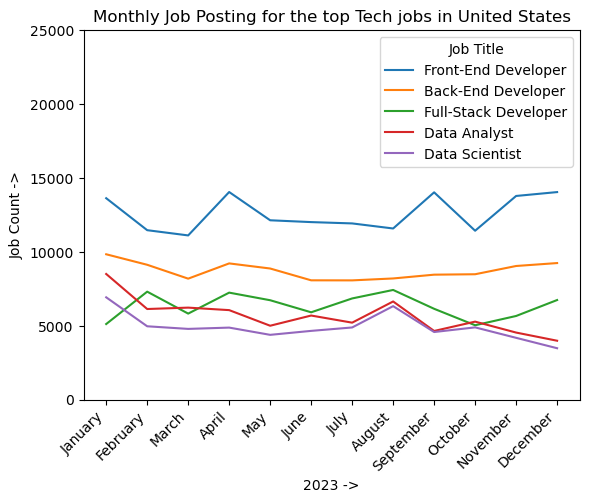

In [62]:
df_us_merged[top_5].plot(kind='line')
plt.title('Monthly Job Posting for the top Tech jobs in United States')
plt.xlabel('2023 ->')
plt.ylabel('Job Count ->')
plt.ylim(0, 25000)
plt.xticks(range(len(df_us_merged.index)), df_us_merged.index, rotation=45, ha='right')
plt.legend(title='Job Title')
plt.show()

# Another Example


In [63]:
## Filter for Data Analysts
df_DA = df[df['job_title_short'] == 'Data Analyst']

df_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']}


In [64]:
# Create a column for month
df_DA['month'] = df_DA['job_posted_date'].dt.month

df_DA.head()

C:\Users\gaura\AppData\Local\Temp\ipykernel_1872\1563014764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA['month'] = df_DA['job_posted_date'].dt.month


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']},2


In [65]:
# ## Pivot table to count job postings by month
df_DA_pivot = df_DA.pivot_table(index='month', aggfunc='count')['job_title_short']

df_DA_pivot

month
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
Name: job_title_short, dtype: int64

In [66]:
df_SDA = df[df['job_title_short'] == 'Senior Data Analyst']

df_SDA['month'] = df_SDA['job_posted_date'].dt.month

df_SDA_pivot = df_SDA.pivot_table(index='month', aggfunc='count')['job_title_short']

df_SDA_pivot

C:\Users\gaura\AppData\Local\Temp\ipykernel_1872\2854850733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SDA['month'] = df_SDA['job_posted_date'].dt.month


month
1     3696
2     2713
3     2454
4     2351
5     1925
6     2319
7     2380
8     2951
9     2194
10    2317
11    2117
12    1799
Name: job_title_short, dtype: int64

In [67]:
merge_DA_pivot = pd.merge(df_DA_pivot, df_SDA_pivot, how='outer', left_index=True, right_index=True)
merge_DA_pivot.columns = ['DA_count', 'SDA_count']
merge_DA_pivot

,DA_count,SDA_count
month,,
1,23585,3696
2,16558,2713
3,16243,2454
4,15514,2351
5,13423,1925
6,16008,2319
7,16095,2380
8,18628,2951
9,14969,2194


# Practise Problems

In [68]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [69]:
# Filter by United States Jobs
df_us = df[df['job_country'] == 'United States']

# Creates month column
df_us['month'] = df_us['job_posted_date'].dt.month

# Pivot table to count us job postings by month
df_us_pivot = df_us.pivot_table(index='month', aggfunc='count')['job_title_short']

df_us_pivot

C:\Users\gaura\AppData\Local\Temp\ipykernel_1872\3787211567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['month'] = df_us['job_posted_date'].dt.month


month
1     22670
2     18020
3     17904
4     17282
5     15283
6     16694
7     16210
8     21029
9     16313
10    16998
11    14736
12    13153
Name: job_title_short, dtype: int64

In [70]:
# Copy of original df
df_copy = df.copy()

# Creates month column
df_copy['month'] = df_copy['job_posted_date'].dt.month

# Pivot table to count us job postings by month
df_copy_pivot = df_copy.pivot_table(index='month', aggfunc='count')['job_title_short']

df_copy_pivot

month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: job_title_short, dtype: int64

In [71]:
# Merging the both pivot tables
merged_data = pd.merge(df_us_pivot, df_copy_pivot, how='outer', left_index=True, right_index=True)

# Name the column
merged_data.columns = ['US_job_posting', 'Total_job_posting']

merged_data

,US_job_posting,Total_job_posting
month,,
1,22670,91822
2,18020,64578
3,17904,64084
4,17282,62919
5,15283,52104
6,16694,61572
7,16210,63777
8,21029,75162
9,16313,62359


<Axes: xlabel='month'>

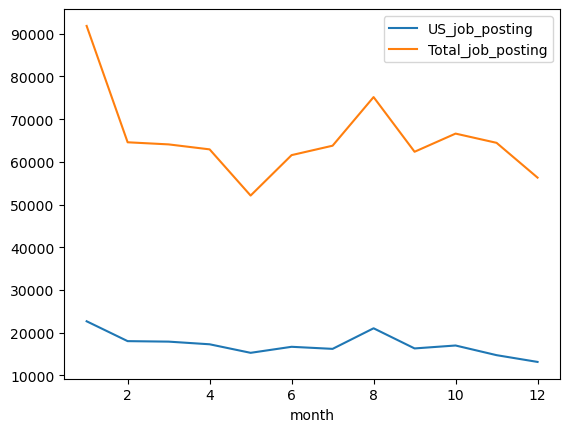

In [72]:
merged_data.plot(kind='line')

# AI Generated Question

   student_id student_name grade
0           1        Alice     A
1           2          Bob     B
2           3      Charlie     C


,emp_id,employee_name,department_id,department_name
0,1,John,1,HR
1,2,Jane,2,Engineering
2,3,Jake,3,Marketing
3,4,Jill,4,Finance
4,5,Jessie,5,Sales


In [80]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

# Perform an outer merge
df_merged = pd.merge(df_jobs, df_companies, on='company_name', how='outer')
df_merged

,job_id,job_title,company_name,industry,company_size
0,3,Product Manager,Apple,Technology,"100,000+"
1,1,Data Scientist,Google,Technology,"100,000+"
2,2,Software Engineer,Microsoft,Technology,"100,000+"
3,4,Marketing Director,Nike,Apparel,"75,000+"
4,5,HR Manager,Starbucks,Food & Beverage,"346,000+"


In [86]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Merge US Jobs and Monthly Postings (2.7.1)
df_US = df[df['job_country'] == 'United States']
df_US['job_posted_month'] = df_US['job_posted_date'].dt.to_period('M')
df_US_monthly_postings = df_US.groupby('job_posted_month').size().reset_index(name='US_count')
print(df_US_monthly_postings.head())

# Merge Non-Remote Jobs and Salary (2.7.2)
df_non_remote = df[df['job_work_from_home'] == False]
print(df_non_remote[['job_title', 'company_name', 'salary_year_avg']].head())

# Merge Company Salary and Remote Count (2.7.3)
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index(name='average_salary')
df_remote_count = df[df['job_work_from_home'] == True].groupby('company_name').size().reset_index(name='remote_count')
df_company_remote_salary = pd.merge(df_company_salary, df_remote_count, on='company_name', how='left')
print(df_company_remote_salary.head())

C:\Users\gaura\AppData\Local\Temp\ipykernel_1872\2267600355.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['job_posted_month'] = df_US['job_posted_date'].dt.to_period('M')


  job_posted_month  US_count
0          2023-01     22670
1          2023-02     18020
2          2023-03     17904
3          2023-04     17282
4          2023-05     15283
                                           job_title  \
0  Senior Clinical Data Engineer / Principal Clin...   
1                                       Data Analyst   
2  Data Engineer/Scientist/Analyst, Mid or Senior...   
3  LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4                             Data Engineer- Sr Jobs   

                   company_name  salary_year_avg  
0          Boehringer Ingelheim              NaN  
1    Hewlett Packard Enterprise              NaN  
2      ALPHA Augmented Services              NaN  
3  Southwest Research Institute              NaN  
4               Kristina Daniel              NaN  
                                  company_name  average_salary  remote_count
0                                      "Dbank"             NaN           NaN
1                            

In [87]:
# Merge Non-Remote Jobs and Salary (2.7.2)
df_non_remote = df[df['job_work_from_home'] == False]
print(df_non_remote[['job_title', 'company_name', 'salary_year_avg']].head())


                                           job_title  \
0  Senior Clinical Data Engineer / Principal Clin...   
1                                       Data Analyst   
2  Data Engineer/Scientist/Analyst, Mid or Senior...   
3  LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4                             Data Engineer- Sr Jobs   

                   company_name  salary_year_avg  
0          Boehringer Ingelheim              NaN  
1    Hewlett Packard Enterprise              NaN  
2      ALPHA Augmented Services              NaN  
3  Southwest Research Institute              NaN  
4               Kristina Daniel              NaN  
